<a href="https://colab.research.google.com/github/joshuabae/Team-JPJ/blob/main/Justin's_Workspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
uploaded = files.upload()

Saving scoring_format.csv to scoring_format.csv
Saving submission_format.csv to submission_format.csv
Saving training.csv to training.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import fft
from google.colab import files

-July 4th peak pic (Day 185, which we assumed was 185th day of the week since that aligns with July 4th)

In [ ]:
training_df = pd.read_csv('training.csv')

index = training_df[training_df['dayOfTheYear'] == 185].index
training_df = training_df.drop(index=index).reset_index(drop=True)

In [ ]:
#training_df.plot(y='GrossSoldQuantity', use_index=True)

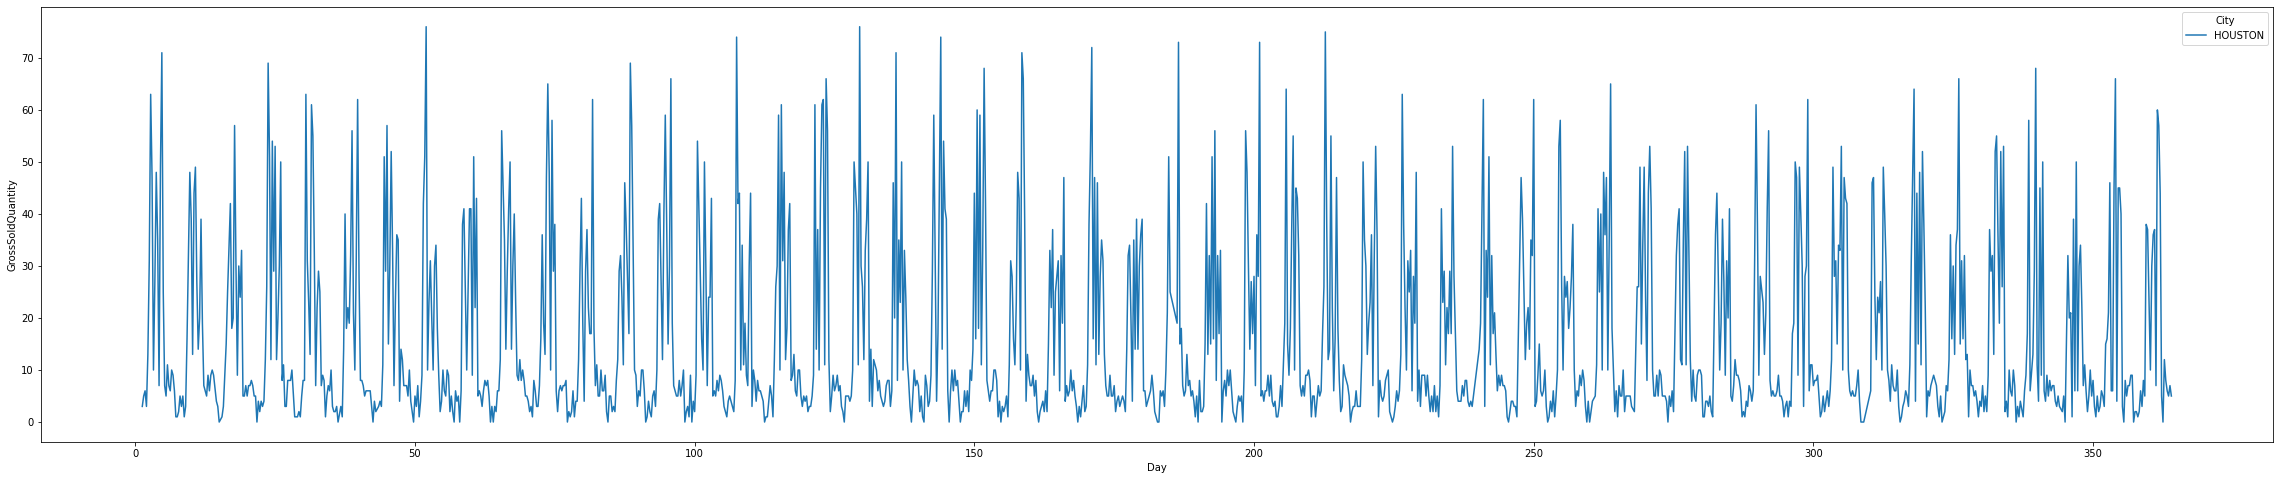

In [ ]:
#Gross Sold Quantity over time for each of the 4 stores

fig, ax = plt.subplots(1,1,figsize=(40,8))
#sb.color_palette("Set1")

# store_df_dict = {}
# for store in [1000, 2000, 3000, 4000]:
#   store_df_dict[store] = training_df[training_df["StoreNumber"] == store]
#   store_df_dict[store].plot(y='GrossSoldQuantity', use_index=True)

training_df["Day"] = ""

training_df["Day"] = training_df.apply(lambda x: (x['dayOfTheYear']+ (0.25*x['3HourBucket'])),axis=1)

for store in [1000]:
  sb.lineplot(data=training_df[training_df["StoreNumber"] == store], y='GrossSoldQuantity',x='Day', hue='City',ax=ax)


In [ ]:
#Gross Sold Quantity over time for each of the 4 stores
day_translator = {0: "Wed",1: "Thu",2: "Fri",3: "Sat",4: "Sun",5: "Mon",6: "Tue"}
day_translator_inverse = {value: key for key, value in day_translator.items()}



df_dict = {}
for dayOfTheWeek in range(7):
  df_dict[dayOfTheWeek] = [{},0]
  df_dict[dayOfTheWeek][1] = training_df[(training_df["dayOfTheYear"] % 7) == dayOfTheWeek]
  day_df_dict = df_dict[dayOfTheWeek][1]
  for timeBlock in [1,2,3,4]:
    df_dict[dayOfTheWeek][0][timeBlock] = [{},0]
    df_dict[dayOfTheWeek][0][timeBlock][1] = day_df_dict[day_df_dict["3HourBucket"] == timeBlock]
    store_day_timeblock_df_dict = df_dict[dayOfTheWeek][0][timeBlock][1]
    #print(len(store_day_timeblock_df_dict.index)) #prints how many data points there are in each day in each time block.


#also separate stores:
# df_dict = {}
# for store in [1000, 2000, 3000, 4000]:
#   df_dict[store] = [{},0]
#   df_dict[store][1] = training_df[training_df["StoreNumber"] == store]
#   store_df_dict = df_dict[store][1]
#   for dayOfTheWeek in range(7):
#     df_dict[store][0][dayOfTheWeek] = [{},0]
#     df_dict[store][0][dayOfTheWeek][1] = store_df_dict[(store_df_dict["dayOfTheYear"] % 7) == dayOfTheWeek]
#     store_day_df_dict = df_dict[store][0][dayOfTheWeek][1]
#     for timeBlock in [1,2,3,4]:
#       df_dict[store][0][dayOfTheWeek][0][timeBlock] = [{},0]
#       df_dict[store][0][dayOfTheWeek][0][timeBlock][1] = store_day_df_dict[store_day_df_dict["3HourBucket"] == timeBlock]
#       store_day_timeblock_df_dict = df_dict[store][0][dayOfTheWeek][0][timeBlock][1]
#       #print(len(store_day_timeblock_df_dict.index)) #prints how many data points there are in each day in each time block.

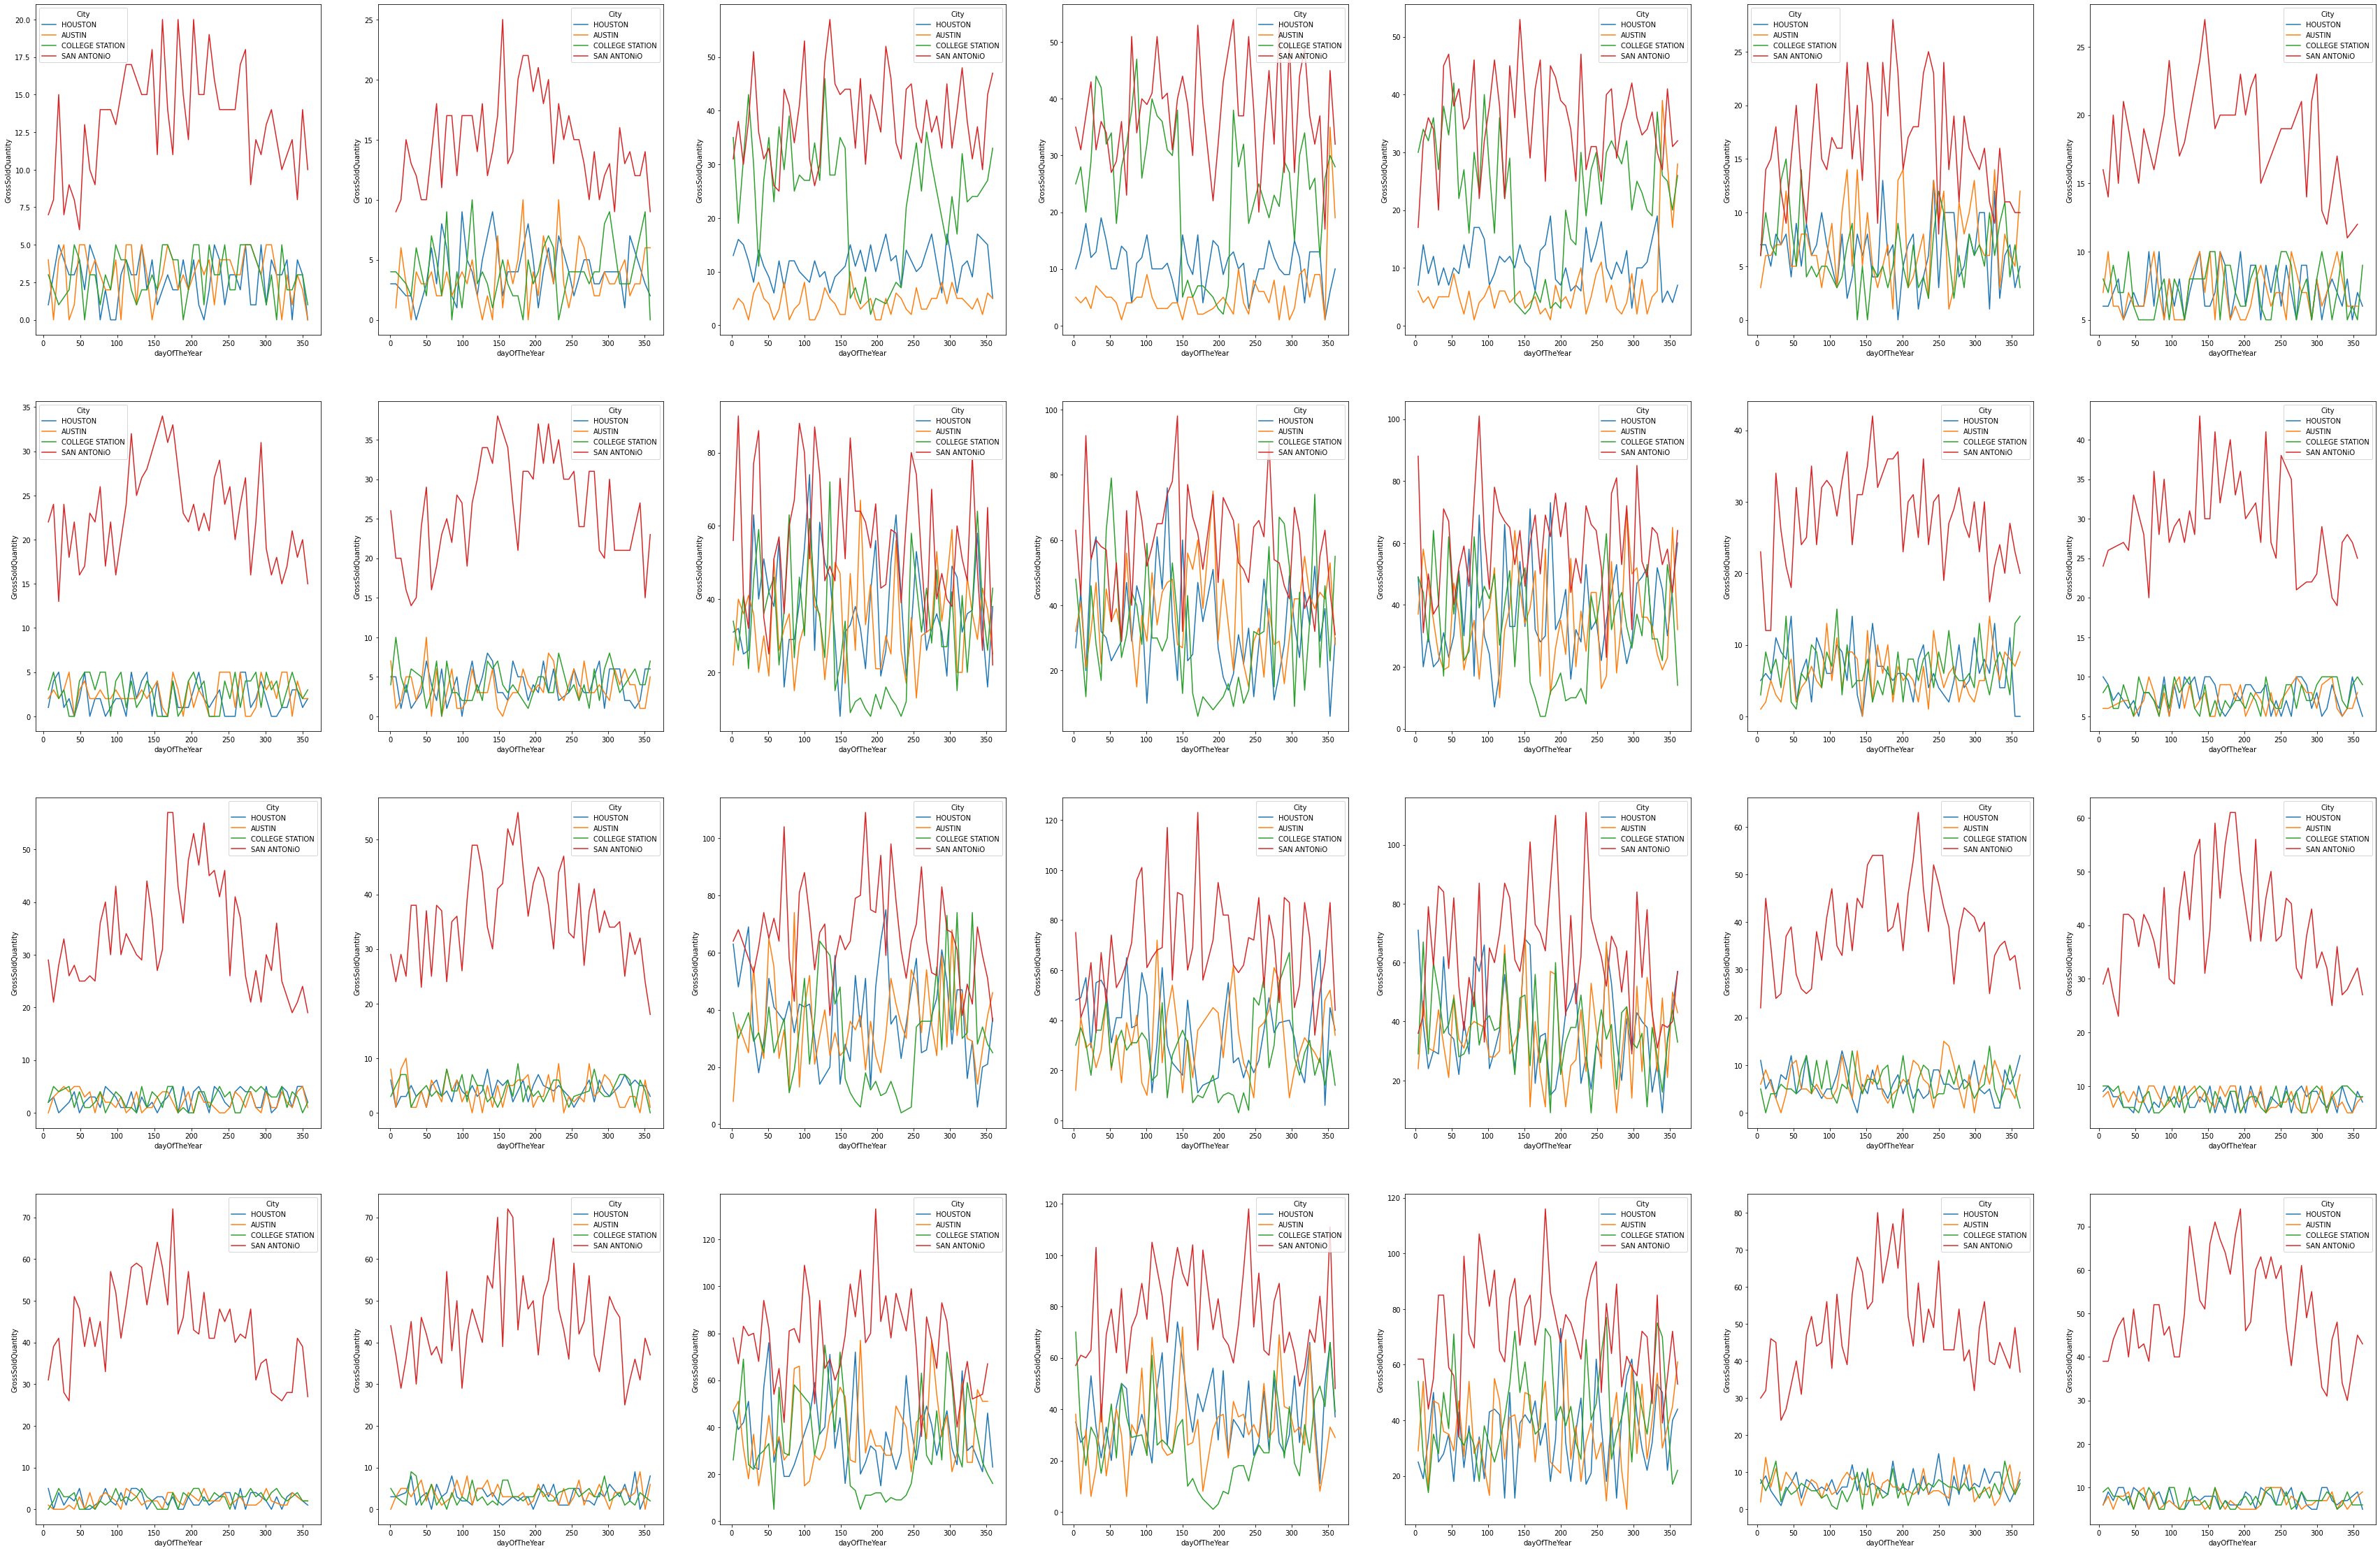

In [ ]:
fig, ax = plt.subplots(4,7,figsize=(60,40))
#sb.color_palette("Set2")



for dayOfTheWeek in range(7):
  for timeBlock in [1,2,3,4]:
      sb.lineplot(data=df_dict[dayOfTheWeek][0][timeBlock][1], y='GrossSoldQuantity', x='dayOfTheYear', hue='City', ax=ax[timeBlock-1, dayOfTheWeek]) #hue seems to break the hues. was hoping either store number or city could be used, but they produce same color for all stores